In [79]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('data/avocado.csv')
df = df[["AveragePrice", "Total Volume", "region"]]
df.head()

,AveragePrice,Total Volume,region
0,1.33,64236.62,Albany
1,1.35,54876.98,Albany
2,0.93,118220.22,Albany
3,1.08,78992.15,Albany
4,1.28,51039.60,Albany


In [81]:
df = df.set_index("region")
df.head()

,AveragePrice,Total Volume
region,,
Albany,1.33,64236.62
Albany,1.35,54876.98
Albany,0.93,118220.22
Albany,1.08,78992.15
Albany,1.28,51039.60


In [83]:
cities = df.loc[["NewYork","LosAngeles"]]
cities = cities.reset_index()
#print(cities.groupby('region').size())
cities.head()
cities 

,region,AveragePrice,Total Volume
0,NewYork,1.17,1129876.05
1,NewYork,1.23,1139347.98
2,NewYork,1.12,1254805.29
3,NewYork,1.20,1068971.54
4,NewYork,1.16,999169.64
...,...,...,...
671,LosAngeles,1.60,100274.88
672,LosAngeles,1.73,97026.15
673,LosAngeles,1.75,94441.50
674,LosAngeles,1.68,106624.63


In [84]:
df_shuffled=sklearn.utils.shuffle(cities)
print(df_shuffled)

         region  AveragePrice  Total Volume
286     NewYork          2.04      63623.43
591  LosAngeles          1.14     108031.14
128     NewYork          1.57    1327763.45
387  LosAngeles          0.89    2800679.50
32      NewYork          1.43    1255552.68
..          ...           ...           ...
262     NewYork          1.96      33409.96
191     NewYork          1.91      12784.61
596  LosAngeles          1.05     108798.33
180     NewYork          2.09      12517.38
481  LosAngeles          0.98    3100355.01

[676 rows x 3 columns]


In [85]:
# cities['region'] = cities['region'].replace(['Houston'],1)
cities['region'] = cities['region'].replace(['LosAngeles'],1)
cities['region'] = cities['region'].replace(['NewYork'],2)
# cities['region'] = cities['region'].replace(['PhoenixTucson'],4)
# cities['region'] = cities['region'].replace(['SanFrancisco'],5)

In [86]:
cities["region"] = pd.to_numeric(cities["region"])
print(cities.groupby('region').size())

region
1    338
2    338
dtype: int64


In [87]:
cities
df

,AveragePrice,Total Volume
region,,
Albany,1.33,64236.62
Albany,1.35,54876.98
Albany,0.93,118220.22
Albany,1.08,78992.15
Albany,1.28,51039.60
...,...,...
WestTexNewMexico,1.63,17074.83
WestTexNewMexico,1.71,13888.04
WestTexNewMexico,1.87,13766.76


In [88]:
cities.head()
cities = cities[["AveragePrice", "Total Volume", "region"]]
cities.head()
average price, volumen

,AveragePrice,Total Volume,region
0,1.17,1129876.05,2
1,1.23,1139347.98,2
2,1.12,1254805.29,2
3,1.20,1068971.54,2
4,1.16,999169.64,2


In [89]:
dataset = cities.values
dataset

array([[1.17000000e+00, 1.12987605e+06, 2.00000000e+00],
       [1.23000000e+00, 1.13934798e+06, 2.00000000e+00],
       [1.12000000e+00, 1.25480529e+06, 2.00000000e+00],
       ...,
       [1.75000000e+00, 9.44415000e+04, 1.00000000e+00],
       [1.68000000e+00, 1.06624630e+05, 1.00000000e+00],
       [1.80000000e+00, 8.75172300e+04, 1.00000000e+00]])

In [90]:
X = dataset[:,0:2]
print(X)
Y = dataset[:,2]
print(Y)

[[1.17000000e+00 1.12987605e+06]
 [1.23000000e+00 1.13934798e+06]
 [1.12000000e+00 1.25480529e+06]
 ...
 [1.75000000e+00 9.44415000e+04]
 [1.68000000e+00 1.06624630e+05]
 [1.80000000e+00 8.75172300e+04]]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.

In [91]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [92]:
X_scale

array([[0.30188679, 0.20532361],
       [0.33018868, 0.20705783],
       [0.27830189, 0.22819695],
       ...,
       [0.5754717 , 0.01574553],
       [0.54245283, 0.01797615],
       [0.5990566 , 0.01447777]])

In [93]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [94]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [146]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(473, 2) (101, 2) (102, 2) (473,) (101,) (102,)


In [96]:
# building and training neural network

# setting up the architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(32, activation='softmax'), # neurons
    Dense(32, activation='relu'), # neurons
    Dense(32, activation='softmax'),
    Dense(32, activation='relu'),
    Dense(1, activation='softmax'),
])

In [97]:
# configuring it for compiling
model.compile(optimizer='sgd',
              loss='kullback_leibler_divergence',
              metrics=['accuracy'])

In [98]:
# training our model
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=45,
          validation_data=(X_val, Y_val))

Train on 473 samples, validate on 101 samples
Epoch 1/45
473/473 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4947 - val_loss: 0.0000e+00 - val_accuracy: 0.5248
Epoch 2/45
473/473 [==============================] - 0s 197us/step - loss: 0.0000e+00 - accuracy: 0.4947 - val_loss: 0.0000e+00 - val_accuracy: 0.5248
Epoch 3/45
473/473 [==============================] - 0s 199us/step - loss: 0.0000e+00 - accuracy: 0.4947 - val_loss: 0.0000e+00 - val_accuracy: 0.5248
Epoch 4/45
473/473 [==============================] - 0s 185us/step - loss: 0.0000e+00 - accuracy: 0.4947 - val_loss: 0.0000e+00 - val_accuracy: 0.5248
Epoch 5/45
473/473 [==============================] - 0s 233us/step - loss: 0.0000e+00 - accuracy: 0.4947 - val_loss: 0.0000e+00 - val_accuracy: 0.5248
Epoch 6/45
473/473 [==============================] - 0s 190us/step - loss: 0.0000e+00 - accuracy: 0.4947 - val_loss: 0.0000e+00 - val_accuracy: 0.5248
Epoch 7/45
473/473 [========================

In [99]:
model.evaluate(X_test, Y_test)[1] # viewing results

102/102 [==============================] - 0s 138us/step


0.5

In [100]:
print(hist.history)

{'val_loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'val_accuracy': [0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5247524976730347, 0.5

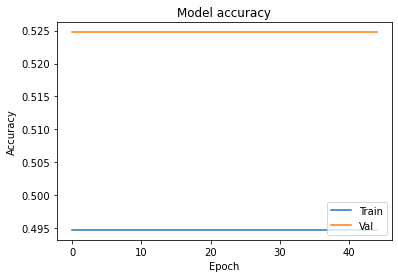

In [101]:
# graphing the accuracy 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [102]:
predictions = model.predict_classes(X)

In [103]:
for i in range(len(X)):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], Y[i]))

[1.17, 1129876.05] => 1 (expected 2)
[1.23, 1139347.98] => 1 (expected 2)
[1.12, 1254805.29] => 1 (expected 2)
[1.2, 1068971.54] => 1 (expected 2)
[1.16, 999169.64] => 1 (expected 2)
[1.14, 1111803.12] => 1 (expected 2)
[1.04, 1357393.34] => 1 (expected 2)
[1.13, 1406262.16] => 1 (expected 2)
[1.06, 2180520.22] => 1 (expected 2)
[1.23, 1048045.86] => 1 (expected 2)
[0.97, 1856337.85] => 1 (expected 2)
[1.28, 1099283.22] => 1 (expected 2)
[1.26, 1342963.26] => 1 (expected 2)
[1.16, 1201066.41] => 1 (expected 2)
[1.18, 1192210.54] => 1 (expected 2)
[1.16, 1479334.84] => 1 (expected 2)
[1.22, 1340925.56] => 1 (expected 2)
[1.22, 1251081.11] => 1 (expected 2)
[1.1, 1477964.12] => 1 (expected 2)
[1.14, 1535981.4] => 1 (expected 2)
[1.1, 1563915.04] => 1 (expected 2)
[1.14, 1458722.6] => 1 (expected 2)
[1.28, 1211731.19] => 1 (expected 2)
[1.37, 1251919.24] => 1 (expected 2)
[1.27, 1338282.24] => 1 (expected 2)
[1.18, 1666825.63] => 1 (expected 2)
[1.36, 1284789.44] => 1 (expected 2)
[1.28, 

In [104]:
print(Y)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.

In [155]:
x = X[:1]
## Costo 1.25, total vendido 12000.64 seria Los Angeles
## Costo 
a = np.array([1.25, 12000.64])
dummy = a[np.newaxis, :]
predictions = model.predict_classes(dummy)
print(predictions)

[[1]]


In [156]:
x = X[:1]
## Costo 1.16, total vendido 15000.82 seria Los Angeles
## Costo 
a = np.array([1.16, 15000.82])
dummy = a[np.newaxis, :]
predictions = model.predict_classes(dummy)
print(predictions)

[[1]]


In [157]:
x = X[:1]
## Costo 1.89, total vendido 8000.53 seria Los Angeles
## Costo 
a = np.array([1.89, 8000.53])
dummy = a[np.newaxis, :]
predictions = model.predict_classes(dummy)
print(predictions)

[[1]]


In [ ]:
x = X[:1]
## Costo 1.89, total vendido 8000.53 seria Los Angeles
## Costo 
a = np.array([1.89, 8000.53])
dummy = a[np.newaxis, :]
predictions = model.predict_classes(dummy)
print(predictions)